In [1]:
import yaml
import os
import subprocess
import random
import csv
import time
import csv
import numpy as np
import math
import pandas as pd
import shutil

import matplotlib.pyplot as plt

In [2]:
def random_choice(X) :
    return round(np.random.choice( np.arange( X[0] , X[1]+X[2] , X[2]) ),X[3])

In [3]:
N1_range = [2,12,1,0]

w1_range = [20, 200, 5, 0] # under, upper, resolution
l1_range = [10, 50, 5, 0]
l2_range = [40, 100, 5, 0]
h1_range = [50, 130, 5, 0]

space1_range = [5, 50, 5, 0] 
space2_range = [5, 50, 5, 0] 
space3_range = [5, 50, 5, 0] 
space4_range = [5, 50, 5, 0] 

coil_width1_range = [3, 10, 1, 0] 
coil_width2_range = [3, 10, 1, 0] 

move_z1_range = [1,5,1,0]
move_z2_range = [1,5,1,0]

offset_z1_range = [-20,20,1,0]
offset_z2_range = [-20,20,1,0]

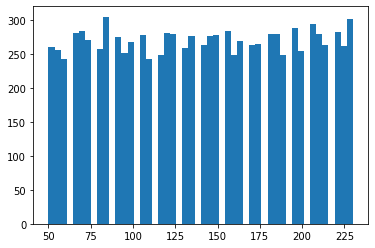

In [13]:
height_array = []
length_array = []
h1_array = []

temp = []

for i in range(10000) : 

    N1 = random_choice(N1_range)

    offset_z1 = random_choice(offset_z1_range)
    offset_z2 = random_choice(offset_z2_range)

    move_z1 = random_choice(move_z1_range)
    move_z2 = random_choice(move_z2_range)

    coil_width1 = random_choice(coil_width1_range)
    coil_width2 = random_choice(coil_width2_range)

    space1 = random_choice(space1_range)
    space2 = random_choice(space2_range)
    space3 = random_choice(space3_range)
    space4 = random_choice(space4_range)

    w1 = random_choice(w1_range)
    l1 = random_choice(l1_range)

    height = max(N1*coil_width1 + (N1-1)*move_z1 + 2*abs(offset_z1), N1*coil_width2 + (N1-1)*move_z2 + 2*abs(offset_z2))
    length = coil_width1 + coil_width2 + space2 + space4

    if length<l2_range[0] : 
        l2_range = [length,100,5,0]
    elif length>l2_range[1] :
        l2_range = [40,length,5,0]
    else :
        l2_range = [40, 100, 5, 0]

    #print(l2_range)
    
    l2 = random_choice(l2_range)


    
    if height>h1_range[1] :
        h1_range = [h1_range[0],height*1.2,h1_range[2],h1_range[3]]
    
    h1 = random_choice(h1_range)




    height_array.append(height)
    length_array.append(length)
    h1_array.append(h1)

    temp.append(N1)




    



plt.hist(h1_array, bins=50)
#plt.hist(height, bins=50)

#plt.hist(temp, bins=50)

plt.show()

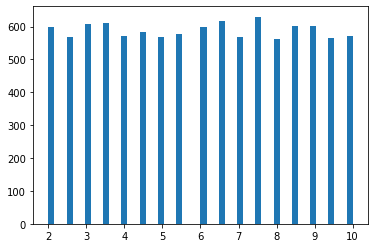

In [15]:
temp = []

for i in range(10000) : 

    coil_width1_range = [2, 10, 0.5, 1] 
    coil_width1 = random_choice(coil_width1_range)


    temp.append(coil_width1)

plt.hist(temp, bins=50)
#plt.hist(height, bins=50)

#plt.hist(temp, bins=50)

plt.show()


    

In [50]:
version_idx_str = 6

temp1 = pd.read_csv(f'.\debug\ML_data\magnetizing_inductance{version_idx_str}.csv', sep=",")
if temp1.columns[1] == "Matrix1.CplCoef(Tx,Rx)^2 * Matrix1.L(Tx,Tx) [mH]" :
    temp1 = temp1.to_numpy()
    temp1[:,1] = temp1[:,1]*1000
    temp1[:,2] = temp1[:,2]*1000
else :
    temp1 = temp1.to_numpy()

temp2 = pd.read_csv(f'.\debug\ML_data\leakage_inductance{version_idx_str}.csv', sep=",")
if temp2.columns[1] == "(1-Matrix1.CplCoef(Tx,Rx)^2) * Matrix1.L(Tx,Tx) [nH]]" :
    temp2 = temp2.to_numpy()
    temp2[:,1] = temp2[:,1]/1000
    temp2[:,2] = temp2[:,2]/1000
else :
    temp2 = temp2.to_numpy()

temp3 = pd.read_csv(f'.\debug\ML_data\litz_Tx_loss{version_idx_str}.csv', sep=",")
if temp3.columns[1] == "StrandedLoss [kW]" :
    temp3 = temp3.to_numpy()
    temp3 = temp3[0][1:3] * 1000
else : 
    temp3 = temp3.to_numpy()
    temp3 = temp3[0][1:3]

temp4 = pd.read_csv(f'.\debug\ML_data\litz_Rx_loss{version_idx_str}.csv', sep=",")
if temp4.columns[1] == "StrandedLoss [kW]" :
    temp4 = temp4.to_numpy()
    temp4 = temp4[0][1:3] * 1000
else : 
    temp4 = temp4.to_numpy()
    temp4 = temp4[0][1:3]

[N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,strand1,strand2] = [1,2,3,4,5,6,1,2,3,4,1,2,1,2,1,2,1,2]

parameter1 = np.array([N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2])
parameter2 = np.array([N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,strand1,strand2,move_z1,move_z2,offset_z1,offset_z2])

temp1 = np.append(parameter1,temp1)
temp2 = np.append(parameter1,temp2)
temp3 = np.append(parameter2,temp3)
temp3 = np.append(temp3,temp4)

array([  1.        ,   2.        ,   3.        ,   4.        ,
         5.        ,   6.        ,   1.        ,   2.        ,
         3.        ,   4.        ,   1.        ,   2.        ,
         1.        ,   2.        ,   1.        ,   2.        ,
         1.        ,   2.        , 202.0859485 , 205.63168589,
       260.411031  , 261.27354495])